In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df_aaindex = pd.read_csv('../data/aaindex/df_aaindex19.csv')
print(df_aaindex.shape)
df_aaindex.head(1)
tmp = df_aaindex.drop('Unnamed: 0',axis=1).T
aa2val = dict()
for aa, val in zip(tmp.index, tmp.values):
    aa2val[aa]=val

(19, 21)


In [3]:
df_detect_peptide_train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train, val = train_test_split(df_detect_peptide_train, test_size=0.2, random_state=7)

In [4]:
label_enc = {v:k+1 for k, v in enumerate('ARNDCQEGHILKMFPSTWYV')}
print(label_enc)

{'A': 1, 'R': 2, 'N': 3, 'D': 4, 'C': 5, 'Q': 6, 'E': 7, 'G': 8, 'H': 9, 'I': 10, 'L': 11, 'K': 12, 'M': 13, 'F': 14, 'P': 15, 'S': 16, 'T': 17, 'W': 18, 'Y': 19, 'V': 20}


In [4]:
# def get_data_labelEnc(df):
#     label_enc = {v:k+1 for k, v in enumerate('ARNDCQEGHILKMFPSTWYV')}
#     label_enc['Z']=0
#     aa_data = [np.array([seq.count(a) for a in 'ARNDCQEGHILKMFPSTWYV'] + list(np.array([aa2val[aa] for aa in seq]).sum(axis=0)))
#                for seq in df.PEP.values]
#     pep_data = [[label_enc[aa] for aa in seq] + [0]*(30-len(seq))
#                for seq in df.PEP.values]
#     en_data = [[label_enc[aa] for aa in seq]
#                for seq in df.En.values]
#     ec_data = [[label_enc[aa] for aa in seq]
#                for seq in df.Ec.values]
#     e1_data = [[label_enc[aa] for aa in seq]
#                if seq != '-' else [0 for _ in range(31)]
#                for seq in df.E1.values]
#     e2_data = [[label_enc[aa] for aa in seq]
#                if seq != '-' else [0 for _ in range(31)]
#                for seq in df.E2.values]
#     return np.array(aa_data), np.array(pep_data), np.array(en_data), np.array(ec_data), np.array(e1_data), np.array(e2_data), np.array(df.ID.values)

# aa_train, pep_train, en_train, ec_train, e1_train, e2_train, y_train = get_data_labelEnc(train)
# aa_val, pep_val, en_val, ec_val, e1_val, e2_val, y_val = get_data_labelEnc(val)
# aa_test, pep_test, en_test, ec_test, e1_test, e2_test, y_test = get_data_labelEnc(test)
# print(aa_train.shape, pep_train.shape, en_train.shape, ec_train.shape, e1_train.shape, e2_train.shape, y_train.shape)
# print(aa_val.shape, pep_val.shape, en_val.shape, ec_val.shape, e1_val.shape, e2_val.shape, y_val.shape)
# print(aa_test.shape, pep_test.shape, en_test.shape, ec_test.shape, e1_test.shape, e2_test.shape, y_test.shape)

In [5]:
pep = train.En.apply(lambda x: x[:15]).values + train.PEP.values + train.Ec.apply(lambda x: x[-15:]).values
label = train.ID.values
train_tf = pd.DataFrame({'PEP':pep, 'ID':label})

In [6]:
pep = val.En.apply(lambda x: x[:15]).values + val.PEP.values + val.Ec.apply(lambda x: x[-15:]).values
label = val.ID.values
val_tf = pd.DataFrame({'PEP':pep, 'ID':label})

In [7]:
pep = test.En.apply(lambda x: x[:15]).values + test.PEP.values + test.Ec.apply(lambda x: x[-15:]).values
label = test.ID.values
test_tf = pd.DataFrame({'PEP':pep, 'ID':label})

In [8]:
def get_data_labelEnc(df):
    label_enc = {v:k+1 for k, v in enumerate('ARNDCQEGHILKMFPSTWYV')}
    label_enc['Z']=0
    aa_data = [np.array([seq.count(a) for a in 'ARNDCQEGHILKMFPSTWYV'] + list(np.array([aa2val[aa] for aa in seq]).sum(axis=0)))
               for seq in df.PEP.values]
    pep_data = [[label_enc[aa] for aa in seq] + [0]*(60-len(seq))
               for seq in df.PEP.values]
    return np.array(aa_data), np.array(pep_data), np.array(en_data), np.array(ec_data), np.array(e1_data), np.array(e2_data), np.array(df.ID.values)

aa_train, pep_train, en_train, ec_train, e1_train, e2_train, y_train = get_data_labelEnc(train)
aa_val, pep_val, en_val, ec_val, e1_val, e2_val, y_val = get_data_labelEnc(val)
aa_test, pep_test, en_test, ec_test, e1_test, e2_test, y_test = get_data_labelEnc(test)
print(aa_train.shape, pep_train.shape, en_train.shape, ec_train.shape, e1_train.shape, e2_train.shape, y_train.shape)
print(aa_val.shape, pep_val.shape, en_val.shape, ec_val.shape, e1_val.shape, e2_val.shape, y_val.shape)
print(aa_test.shape, pep_test.shape, en_test.shape, ec_test.shape, e1_test.shape, e2_test.shape, y_test.shape)

(543784, 39) (543784, 30) (543784, 31) (543784, 31) (543784, 31) (543784, 31) (543784,)
(135946, 39) (135946, 30) (135946, 31) (135946, 31) (135946, 31) (135946, 31) (135946,)
(134200, 39) (134200, 30) (134200, 31) (134200, 31) (134200, 31) (134200, 31) (134200,)


# Train

In [9]:
from tensorflow.python.client import device_lib

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
    except RuntimeError as e:
        print(e)

In [10]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# high param

In [11]:
from tensorflow import keras

In [12]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs
    
    
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm
    
    
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
    

In [13]:
embedding_dim = 32  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 32  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

In [50]:
# Embedding
embedding_layer = TokenAndPositionEmbedding(60, 21, 32)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)

peps = tf.keras.layers.Input(shape=((60,)))
peps_embed = embedding_layer(peps)
peps_embed = transformer_block(peps_embed)

meta = tf.keras.layers.Input(shape=((39,)))  # peptide info

pep_embed = peps_embed[15:-15]
n_embed = peps_embed[:31]
c_embed = peps_embed[-31:]


if ts_idx[1] != -1:
    m1_embed = peps_embed[ts_idx[1]-15:ts_idx[1]+15]
else:
    m1_embed = tf.Tensor([0.0]*31)
if ts_idx[2] != -1:
    m2_embed = peps_embed[ts_idx[2]-15:ts_idx[2]+15]
else:
    m2_embed = tf.Tensor([0.0]*31)

    
    
    
    
# LSTM
ts_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8))
pep_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))

n_lstm = ts_lstm(n_embed)
c_lstm = ts_lstm(c_embed)
m1_lstm = ts_lstm(m1_embed)
m2_lstm = ts_lstm(m2_embed)
p_lstm = pep_lstm(pep_embed)

net_meta = tf.keras.layers.Dense(32, activation='relu')(meta)
net_meta = tf.keras.layers.Dropout(np.random.uniform(0, 0.2))(net_meta)

# Dense
merge = tf.keras.layers.concatenate([pep_lstm, 
                                     net_meta,
                                     n_lstm,
                                     c_lstm,
                                     m1_lstm,
                                     m2_lstm])

net_merge = tf.keras.layers.Dense(64, activation='relu')(merge)
net_merge = tf.keras.layers.Dropout(np.random.uniform(0, 0.2))(net_merge)
net_merge = tf.keras.layers.Dense(32, activation='relu')(net_merge)
net_merge = tf.keras.layers.Dropout(np.random.uniform(0, 0.2))(net_merge)

output = tf.keras.layers.Dense(1, activation = 'sigmoid')(net_merge)

model_high = tf.keras.Model(inputs=[peps, meta, ts_idx],
                            outputs=[output])

model_high.summary()

model_high.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(5e-4),
              metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      mode='min', 
                                      verbose=1,
                                      patience=50)

TypeError: Cannot convert a symbolic Keras input/output to a numpy array. This error may indicate that you're trying to pass a symbolic value to a NumPy call, which is not supported. Or, you may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.

In [20]:
history = model_high.fit([pep_train, aa_train],
                    y_train, 
                    epochs=300,
                    batch_size=128,
                    validation_data=([pep_val, aa_val]),
                    callbacks=[es]
                        )

Epoch 1/300
4247/4247 [==============================] - 361s 85ms/step - loss: 0.4152 - accuracy: 0.8119 - val_loss: 0.4071 - val_accuracy: 0.8155
Epoch 2/300
4247/4247 [==============================] - 362s 85ms/step - loss: 0.4123 - accuracy: 0.8134 - val_loss: 0.4037 - val_accuracy: 0.8178
Epoch 3/300
4247/4247 [==============================] - 376s 88ms/step - loss: 0.4096 - accuracy: 0.8149 - val_loss: 0.4014 - val_accuracy: 0.8198
Epoch 4/300
4247/4247 [==============================] - 369s 87ms/step - loss: 0.4074 - accuracy: 0.8165 - val_loss: 0.4003 - val_accuracy: 0.8206
Epoch 5/300
4247/4247 [==============================] - 371s 87ms/step - loss: 0.4058 - accuracy: 0.8174 - val_loss: 0.3987 - val_accuracy: 0.8214
Epoch 6/300
4247/4247 [==============================] - 385s 91ms/step - loss: 0.4041 - accuracy: 0.8179 - val_loss: 0.4008 - val_accuracy: 0.8204
Epoch 7/300
4247/4247 [==============================] - 376s 88ms/step - loss: 0.4025 - accuracy: 0.8188 - val_

Epoch 56/300
4247/4247 [==============================] - 491s 116ms/step - loss: 0.3748 - accuracy: 0.8339 - val_loss: 0.3794 - val_accuracy: 0.8321
Epoch 57/300
4247/4247 [==============================] - 488s 115ms/step - loss: 0.3741 - accuracy: 0.8341 - val_loss: 0.3785 - val_accuracy: 0.8333
Epoch 58/300
4247/4247 [==============================] - 492s 116ms/step - loss: 0.3744 - accuracy: 0.8340 - val_loss: 0.3777 - val_accuracy: 0.8329
Epoch 59/300
4247/4247 [==============================] - 489s 115ms/step - loss: 0.3742 - accuracy: 0.8339 - val_loss: 0.3761 - val_accuracy: 0.8333
Epoch 60/300
4247/4247 [==============================] - 485s 114ms/step - loss: 0.3742 - accuracy: 0.8344 - val_loss: 0.3786 - val_accuracy: 0.8324
Epoch 61/300
4247/4247 [==============================] - 478s 113ms/step - loss: 0.3738 - accuracy: 0.8346 - val_loss: 0.3746 - val_accuracy: 0.8337
Epoch 62/300
4247/4247 [==============================] - 497s 117ms/step - loss: 0.3737 - accuracy:

In [21]:
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

# eval

4188/4188 [==============================] - 101s 24ms/step - loss: 0.3660 - accuracy: 0.8360
Test Loss: 0.36601436138153076
Test Accuracy: 0.8359752893447876
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     66996
           1       0.81      0.88      0.84     66996

    accuracy                           0.84    133992
   macro avg       0.84      0.84      0.84    133992
weighted avg       0.84      0.84      0.84    133992

rf auc : 0.9185943275477961


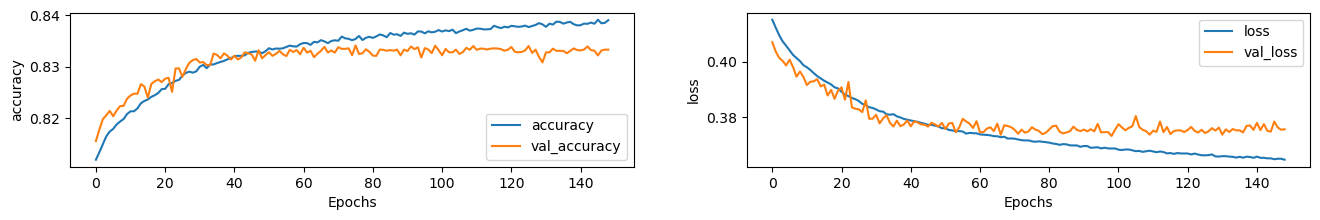

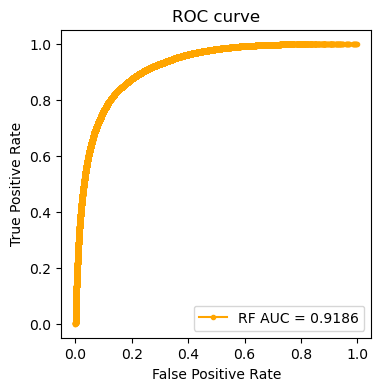

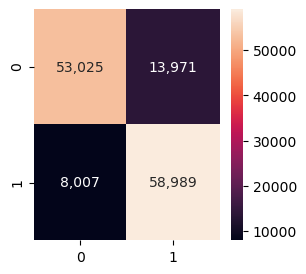

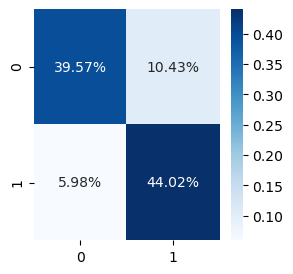

In [22]:
test_loss, test_acc = model_high.evaluate([pep_test, aa_test, en_test, ec_test, e1_test, e2_test], y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# prediction
y_pred = [1 if i>=0.5 else 0 for i in model_high.predict([pep_test, aa_test, en_test, ec_test, e1_test, e2_test])]
print(classification_report(y_test, y_pred))
# AUC
probs = model_high.predict([pep_test, aa_test, en_test, ec_test, e1_test, e2_test])
rf_auc = roc_auc_score(y_test, probs)
print('rf auc : {}'.format(rf_auc))
# plot the roc curve for the model_high
rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(4, 4))
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF AUC = {:.4f}'.format(rf_auc), color='orange')
plt.title('ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [23]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model_high.save("compareModel/2021KSBi_multi_lr0005")

INFO:tensorflow:Assets written to: compareModel/2021KSBi_multi_lr0005/assets


INFO:tensorflow:Assets written to: compareModel/2021KSBi_multi_lr0005/assets


# AUC viz

In [11]:
model_high_re = tf.keras.models.load_model("compareModel/2021KSBi_multi_lr0005")

In [12]:
# AUC
probs_ours = model_high_re.predict([pep_test, aa_test, en_test, ec_test, e1_test, e2_test])
rf_auc = roc_auc_score(y_test, probs_ours)

In [13]:
fpr_ours, tpr_ours, _ = roc_curve(y_test, probs_ours)

In [ ]:
# allow_pickle=False

In [14]:
fpr_dmp = np.load('compareModel/2019Bioinformatics_DeepMSPeptide/fpr.npy')
tpr_dmp = np.load('compareModel/2019Bioinformatics_DeepMSPeptide/tpr.npy')

fpr_pf = np.load('compareModel/2021ACS_PepFormer/fpr.npy')
tpr_pf = np.load('compareModel/2021ACS_PepFormer/tpr.npy')

fpr_ap3 = np.load('compareModel/2019ACS_AP3/fpr.npy')
tpr_ap3 = np.load('compareModel/2019ACS_AP3/tpr.npy')

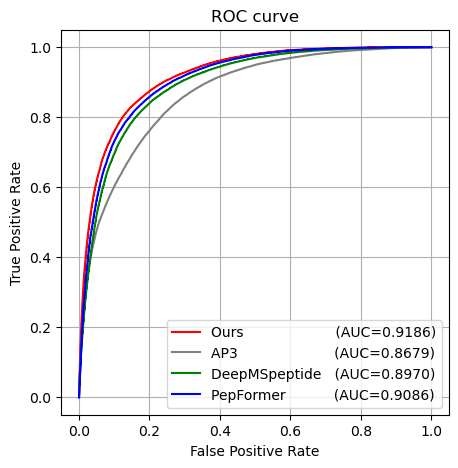

In [30]:
plt.figure(figsize=(5, 5))

# ours
plt.plot(fpr_ours, tpr_ours, marker=',', 
         label='Ours                     (AUC={:.4f})'.format(rf_auc), 
         color='red')
plt.plot(fpr_ap3, tpr_ap3, marker=',', 
         label='AP3                      (AUC=0.8679)', 
         color='gray')
plt.plot(fpr_dmp, tpr_dmp, marker=',', 
         label='DeepMSpeptide   (AUC=0.8970)', 
         color='green')
plt.plot(fpr_pf, tpr_pf, marker=',', 
         label='PepFormer           (AUC=0.9086)', 
         color='blue')


plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

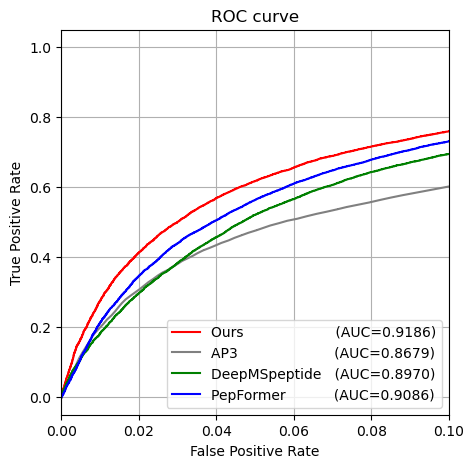

In [36]:
plt.figure(figsize=(5, 5))

# ours
plt.plot(fpr_ours, tpr_ours, marker=',', 
         label='Ours                     (AUC={:.4f})'.format(rf_auc), 
         color='red')
plt.plot(fpr_ap3, tpr_ap3, marker=',', 
         label='AP3                      (AUC=0.8679)', 
         color='gray')
plt.plot(fpr_dmp, tpr_dmp, marker=',', 
         label='DeepMSpeptide   (AUC=0.8970)', 
         color='green')
plt.plot(fpr_pf, tpr_pf, marker=',', 
         label='PepFormer           (AUC=0.9086)', 
         color='blue')


plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim(0, 0.1)
# plt.ylim(0.4, 1)
plt.grid()
plt.show()